In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import show
from datetime import datetime,date

In [2]:
crime_data = pd.read_csv('/Users/ameykelekar/Documents/DataAnalysisUsingPython/Data Analysis on Crime in Chicago/Chicago_crime/Crimes_-_2001_to_present.csv')

In [3]:
crime_data.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,6309193,HP390075,06/11/2008 11:00:00 PM,045XX W 87TH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,...,18.0,70.0,26,1147487.0,1846446.0,2008,02/04/2016 06:33:39 AM,41.734598,-87.735264,"(41.734598385, -87.73526384)"
1,6309194,HP399120,06/16/2008 07:05:27 PM,010XX N MASSASOIT AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,29.0,25.0,06,1137833.0,1906342.0,2008,02/04/2016 06:33:39 AM,41.899141,-87.769192,"(41.899141429, -87.769191932)"


In [4]:
community_area = pd.read_csv('/Users/ameykelekar/Documents/DataAnalysisUsingPython/Data Analysis on Crime in Chicago/Chicago_Community_Area/chicago_communinity_area_data.csv')

In [5]:
community_area.head(5)

,Community Area,Community Name
0,0,City of Chicago
1,1,Rogers Park
2,2,West Ridge
3,3,Uptown
4,4,Lincoln Square


In [6]:
crime_data_community_name = crime_data.merge(community_area,how='outer')

In [7]:
crime_data_community_name.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community Name
0,6309193,HP390075,06/11/2008 11:00:00 PM,045XX W 87TH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,...,70.0,26,1147487.0,1846446.0,2008,02/04/2016 06:33:39 AM,41.734598,-87.735264,"(41.734598385, -87.73526384)",Ashburn
1,6309251,HP392697,06/01/2008 12:00:00 AM,037XX W 86TH PL,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,70.0,06,1153047.0,1846955.0,2008,02/04/2016 06:33:39 AM,41.735887,-87.714881,"(41.735887342, -87.714880776)",Ashburn
2,6309268,HP398308,06/16/2008 12:15:00 PM,026XX W 80TH ST,0340,ROBBERY,ATTEMPT: STRONGARM-NO WEAPON,"SCHOOL, PUBLIC, GROUNDS",False,False,...,70.0,03,1160325.0,1851496.0,2008,02/04/2016 06:33:39 AM,41.748202,-87.688092,"(41.748201953, -87.688091884)",Ashburn
3,6309294,HP398203,06/16/2008 08:00:00 AM,077XX S SPAULDING AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,...,70.0,05,1155723.0,1853123.0,2008,02/04/2016 06:33:39 AM,41.752760,-87.704912,"(41.752760169, -87.70491176)",Ashburn
4,6309454,HP399793,06/16/2008 06:30:00 PM,079XX S CAMPBELL AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,70.0,05,1161093.0,1851842.0,2008,02/04/2016 06:33:39 AM,41.749136,-87.685268,"(41.749135591, -87.685268108)",Ashburn


In [8]:
crime_data_community_name['Date'] = pd.to_datetime(crime_data_community_name['Date'])

In [9]:
crime_data_community_name['Date'][0]

Timestamp('2008-06-11 23:00:00')

In [10]:
mask = (crime_data_community_name['Date'] > '2016-11-1') & (crime_data_community_name['Date'] <= '2016-11-30')

In [11]:
df = crime_data_community_name.loc[mask].reset_index()

In [12]:
df.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community Name
0,40147,10737487,HZ497527,2016-11-01 03:30:00,046XX W 83RD ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,...,70.0,14,1147330.0,1849154.0,2016,11/08/2016 03:49:55 PM,41.742033,-87.735770,"(41.742032629, -87.735770141)",Ashburn
1,40148,10737690,HZ497596,2016-11-01 06:20:00,037XX W PIPPIN ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,70.0,07,1152242.0,1853396.0,2016,11/08/2016 03:49:55 PM,41.753578,-87.717661,"(41.75357839, -87.717661201)",Ashburn
2,40149,10737691,HZ497597,2016-11-01 06:35:00,038XX W 76TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,DRIVEWAY - RESIDENTIAL,False,...,70.0,07,1151895.0,1853648.0,2016,11/08/2016 03:49:55 PM,41.754277,-87.718926,"(41.754276728, -87.718926252)",Ashburn
3,40150,10738456,HZ498284,2016-11-01 15:20:00,081XX S WESTERN AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,...,70.0,06,1161799.0,1850312.0,2016,11/08/2016 03:49:55 PM,41.744922,-87.682723,"(41.744922417, -87.682723428)",Ashburn
4,40151,10738498,HZ498375,2016-11-01 15:00:00,037XX W 79TH ST,0820,THEFT,$500 AND UNDER,STREET,False,...,70.0,06,1152213.0,1851959.0,2016,11/08/2016 03:49:55 PM,41.749636,-87.717805,"(41.749635589, -87.717805151)",Ashburn


In [13]:
new_df = df.groupby(['Community Name','Primary Type']).size().reset_index(name="Crimes Count")

In [14]:
new_df1 = new_df.loc[new_df['Primary Type'].isin (['ASSAULT','ROBBERY','BATTERY','CRIM SEXUAL ASSAULT','HOMICIDE','ARSON','THEFT','BURGLARY','MOTOR VEHICLE THEFT','CRIMINAL DAMAGE','PROSTITUTION','NARCOTICS'])]

In [15]:
new_df1['Crime Category'] = new_df1['Primary Type'].apply(lambda x : "VIOLENT" if x in ['ASSAULT','ROBBERY','BATTERY','CRIM SEXUAL ASSAULT','HOMICIDE'] else "PROPERTY" if x in ['ARSON','THEFT','BURGLARY','MOTOR VEHICLE THEFT'] else "QUALITY OF LIFE")

/Users/ameykelekar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
new_df1.head(5)

,Community Name,Primary Type,Crimes Count,Crime Category
0,Albany Park,ASSAULT,10,VIOLENT
1,Albany Park,BATTERY,30,VIOLENT
2,Albany Park,BURGLARY,21,PROPERTY
3,Albany Park,CRIM SEXUAL ASSAULT,2,VIOLENT
4,Albany Park,CRIMINAL DAMAGE,26,QUALITY OF LIFE


In [17]:
combined_df = new_df1.groupby(['Community Name','Crime Category']).agg({'Crimes Count': 'sum'}).reset_index()

In [18]:
combined_df['Percentage Crime Rate'] = 100*combined_df['Crimes Count']/len(df)

In [19]:
combined_df.head(5)

,Community Name,Crime Category,Crimes Count,Percentage Crime Rate
0,Albany Park,PROPERTY,87,0.435501
1,Albany Park,QUALITY OF LIFE,27,0.135155
2,Albany Park,VIOLENT,62,0.310357
3,Archer Heights,PROPERTY,45,0.225259
4,Archer Heights,QUALITY OF LIFE,11,0.055063


In [20]:
property_df = new_df1[new_df1['Crime Category'] == 'PROPERTY']

In [21]:
property_df['Percentage Crime Rate'] = 100*property_df['Crimes Count']/len(df)

/Users/ameykelekar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
property_df.head(5)

,Community Name,Primary Type,Crimes Count,Crime Category,Percentage Crime Rate
2,Albany Park,BURGLARY,21,PROPERTY,0.105121
8,Albany Park,MOTOR VEHICLE THEFT,11,PROPERTY,0.055063
15,Albany Park,THEFT,55,PROPERTY,0.275317
19,Archer Heights,BURGLARY,12,PROPERTY,0.060069
24,Archer Heights,MOTOR VEHICLE THEFT,14,PROPERTY,0.070081


In [23]:
property_df1 = property_df.pivot(index='Community Name', columns='Primary Type', values='Percentage Crime Rate').fillna(value=0).reset_index()

In [24]:
property_df1.head(5)

Primary Type,Community Name,ARSON,BURGLARY,MOTOR VEHICLE THEFT,THEFT
0,Albany Park,0.000000,0.105121,0.055063,0.275317
1,Archer Heights,0.000000,0.060069,0.070081,0.095109
2,Armour Square,0.000000,0.025029,0.005006,0.110127
3,Ashburn,0.005006,0.085098,0.195225,0.225259
4,Auburn Gresham,0.000000,0.185213,0.120138,0.415478


In [25]:
property_df1.columns[1:]

Index(['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT'], dtype='object', name='Primary Type')

In [26]:
quality_of_life_df = new_df1[new_df1['Crime Category'] == 'QUALITY OF LIFE']

In [27]:
quality_of_life_df['Percentage Crime Rate'] = 100*quality_of_life_df['Crimes Count']/len(df)

/Users/ameykelekar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
quality_of_life_df.head(5)

,Community Name,Primary Type,Crimes Count,Crime Category,Percentage Crime Rate
4,Albany Park,CRIMINAL DAMAGE,26,QUALITY OF LIFE,0.130150
9,Albany Park,NARCOTICS,1,QUALITY OF LIFE,0.005006
20,Archer Heights,CRIMINAL DAMAGE,9,QUALITY OF LIFE,0.045052
25,Archer Heights,NARCOTICS,2,QUALITY OF LIFE,0.010012
33,Armour Square,CRIMINAL DAMAGE,3,QUALITY OF LIFE,0.015017


In [29]:
quality_of_life_df1 = quality_of_life_df.pivot(index='Community Name', columns='Primary Type', values='Percentage Crime Rate').fillna(value=0).reset_index()

In [30]:
quality_of_life_df1.head(5)

Primary Type,Community Name,CRIMINAL DAMAGE,NARCOTICS,PROSTITUTION
0,Albany Park,0.130150,0.005006,0.000000
1,Archer Heights,0.045052,0.010012,0.000000
2,Armour Square,0.015017,0.010012,0.000000
3,Ashburn,0.195225,0.005006,0.000000
4,Auburn Gresham,0.455524,0.060069,0.005006


In [31]:
quality_of_life_df1.columns[1:]

Index(['CRIMINAL DAMAGE', 'NARCOTICS', 'PROSTITUTION'], dtype='object', name='Primary Type')

In [32]:
violent_df = new_df1[new_df1['Crime Category'] == 'VIOLENT']

In [33]:
violent_df['Percentage Crime Rate'] = 100*violent_df['Crimes Count']/len(df)

/Users/ameykelekar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
violent_df.head(5)

,Community Name,Primary Type,Crimes Count,Crime Category,Percentage Crime Rate
0,Albany Park,ASSAULT,10,VIOLENT,0.050058
1,Albany Park,BATTERY,30,VIOLENT,0.150173
3,Albany Park,CRIM SEXUAL ASSAULT,2,VIOLENT,0.010012
13,Albany Park,ROBBERY,20,VIOLENT,0.100115
17,Archer Heights,ASSAULT,1,VIOLENT,0.005006


In [35]:
violent_df1 = violent_df.pivot(index='Community Name', columns='Primary Type', values='Percentage Crime Rate').fillna(value=0).reset_index()

In [36]:
violent_df1.head(5)

Primary Type,Community Name,ASSAULT,BATTERY,CRIM SEXUAL ASSAULT,HOMICIDE,ROBBERY
0,Albany Park,0.050058,0.150173,0.010012,0.000000,0.100115
1,Archer Heights,0.005006,0.045052,0.000000,0.005006,0.015017
2,Armour Square,0.005006,0.100115,0.000000,0.005006,0.080092
3,Ashburn,0.060069,0.120138,0.000000,0.000000,0.130150
4,Auburn Gresham,0.195225,0.680783,0.015017,0.015017,0.195225


In [37]:
violent_df1.columns[1:]

Index(['ASSAULT', 'BATTERY', 'CRIM SEXUAL ASSAULT', 'HOMICIDE', 'ROBBERY'], dtype='object', name='Primary Type')

In [38]:
new_combined_df = combined_df.pivot(index='Community Name', columns='Crime Category', values='Percentage Crime Rate').reset_index()

In [39]:
new_combined_df.head(5)

Crime Category,Community Name,PROPERTY,QUALITY OF LIFE,VIOLENT
0,Albany Park,0.435501,0.135155,0.310357
1,Archer Heights,0.225259,0.055063,0.070081
2,Armour Square,0.140161,0.025029,0.190219
3,Ashburn,0.510587,0.200230,0.310357
4,Auburn Gresham,0.720829,0.520599,1.101266


In [40]:
new_combined_df.columns[1:]

Index(['PROPERTY', 'QUALITY OF LIFE', 'VIOLENT'], dtype='object', name='Crime Category')

In [46]:
def create_graph(dFrame,title_list,color,xlim):
    sns.set(style="whitegrid")
    # Make the PairGrid
    g = sns.PairGrid(dFrame, x_vars=dFrame.columns[1:], y_vars=["Community Name"], size=12, aspect=.25)

    # Draw a dot plot using the stripplot function
    g.map(sns.stripplot, size=10, orient="h", palette= color, edgecolor="gray")

    # Use the same x axis limits on all columns and add better labels
    g.set(xlim=(0, xlim), xlabel="Percentage Crime Rate", ylabel="")

    # Use semantically meaningful titles for the columns
    titles = title_list

    for ax, title in zip(g.axes.flat, titles):
        # Set a different title for each axes
        ax.set(title=title)
         # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

    sns.despine(left=True, bottom=True)
    show()

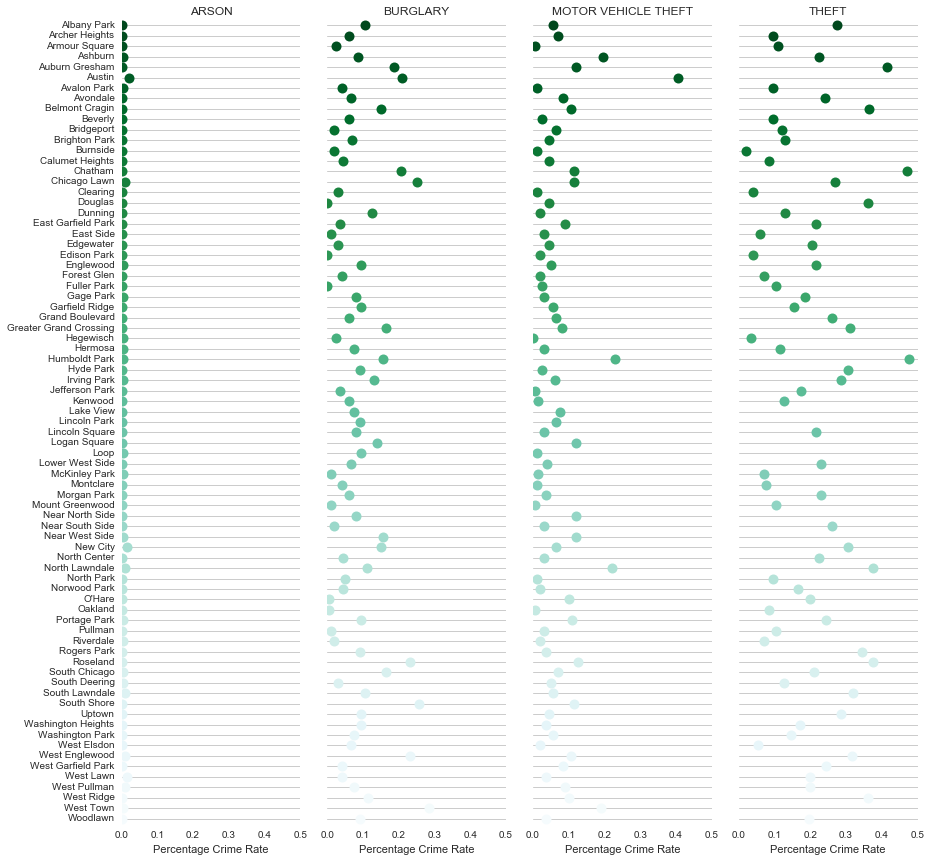

In [48]:
create_graph(property_df1,["ARSON", "BURGLARY", "MOTOR VEHICLE THEFT", "THEFT"],"BuGn_r",0.5)

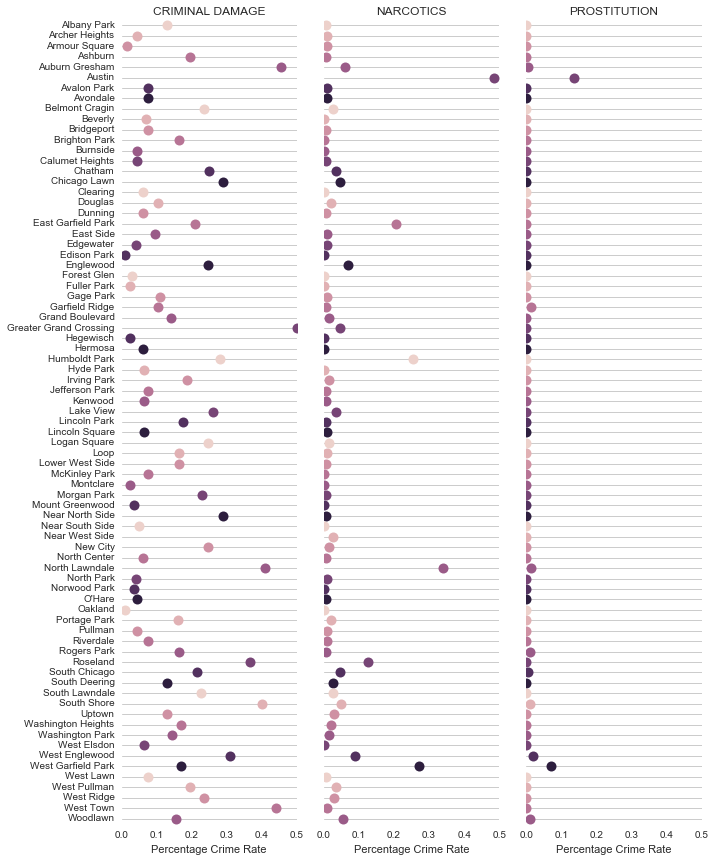

In [49]:
create_graph(quality_of_life_df1,['CRIMINAL DAMAGE', 'NARCOTICS', 'PROSTITUTION'],sns.cubehelix_palette(8),0.5)

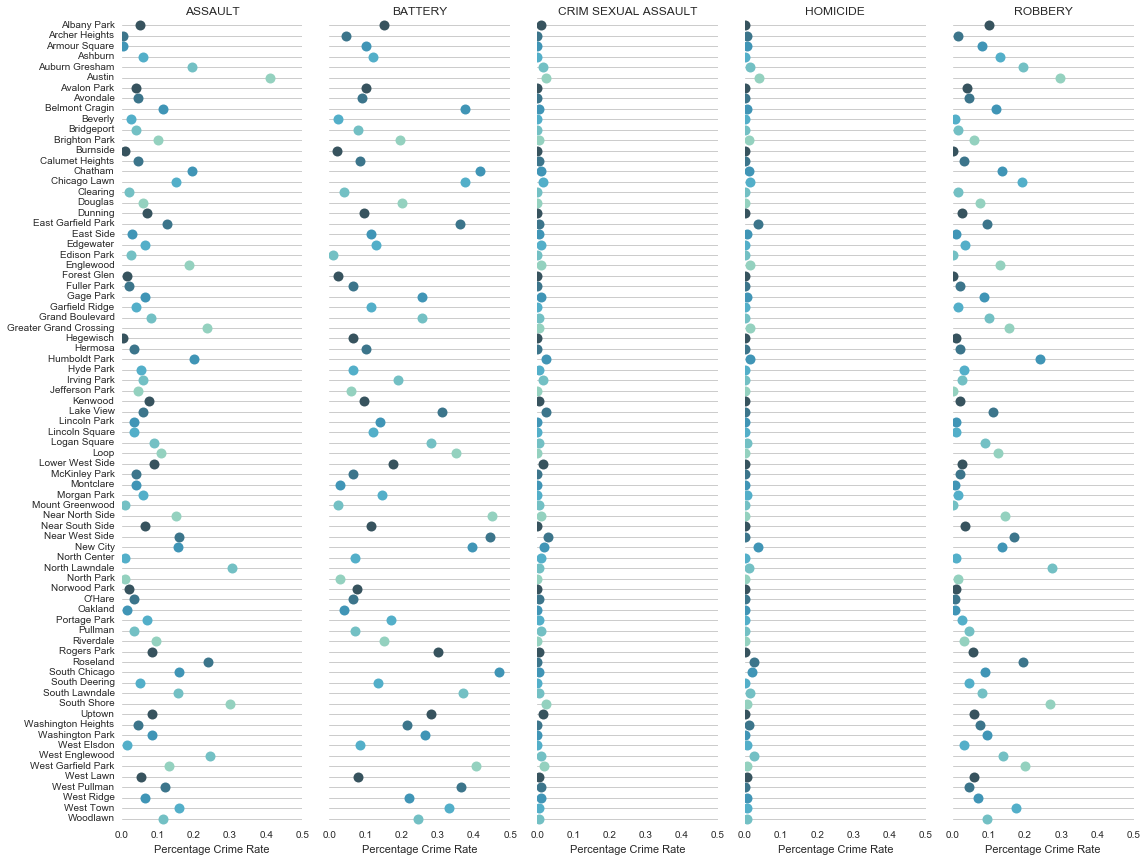

In [50]:
create_graph(violent_df1,['ASSAULT', 'BATTERY', 'CRIM SEXUAL ASSAULT', 'HOMICIDE', 'ROBBERY'],sns.color_palette("GnBu_d"),0.5)

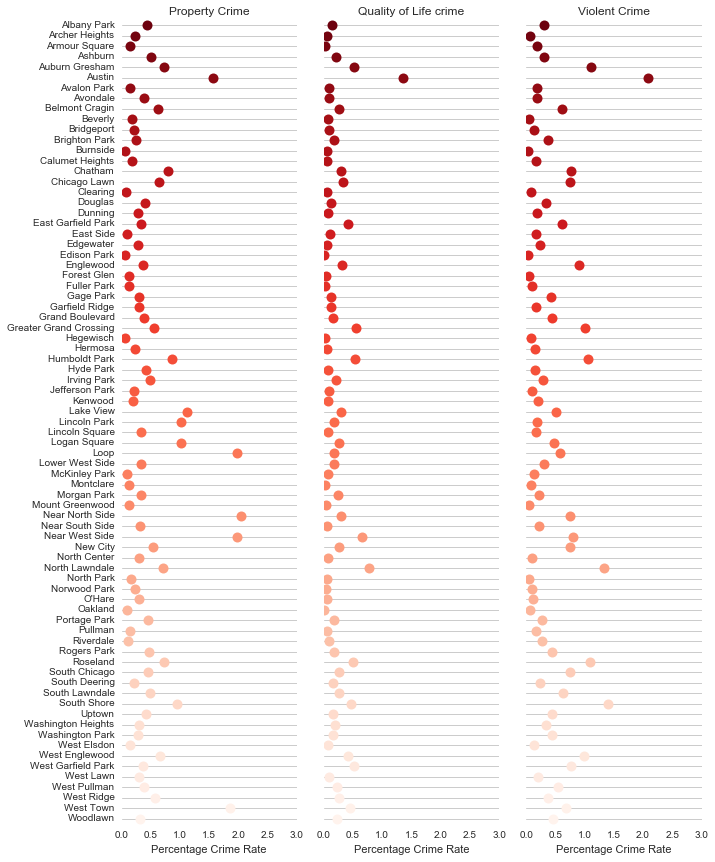

In [47]:
create_graph(new_combined_df,["Property Crime", "Quality of Life crime", "Violent Crime"],"Reds_r",3)